In [62]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

data = pd.read_csv("/content/train.csv")

# print(data.head())

In [63]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data) # avoid shuffling

train_data = data[1000:m].T
train_label = train_data[0]
train_pixels = train_data[1:n] / 255
_,m_train = train_pixels.shape

valid_data = data[0:1000].T
valid_label = valid_data[0]
valid_pixels = valid_data[1:n]

In [64]:
def init_params():
    W1 = np.random.rand(10,784) - 0.5
    b1 = np.random.rand(10,1) - 0.5
    W2 = np.random.rand(10,10) - 0.5
    b2 = np.random.rand(10,1) - 0.5
    return W1, b1, W2, b2

def forward_prop(W1, b1, W2, b2, pixels):

    Z1 = W1.dot(pixels) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)

    return Z1, A1, Z2, A2



def ReLU(Z):
    return np.maximum(0, Z)

def softmax(Z):
    return np.exp(Z) / sum(np.exp(Z))


# Turn labels into vectors:
def one_hot(label):
  label = label.astype(int)
  one_hot_label = np.zeros((label.size, int(label.max()) + 1))
  one_hot_label[np.arange(label.size), label] = 1
  one_hot_label = one_hot_label.T
  return one_hot_label

def ReLU_derivative(Z):
    return Z > 0

# Calculating how much weights and biases of output and hidden layer contributed to the error.
# Return all error gradients to fix weights and biases:
def back_prop(Z1, A1, Z2, A2, W1, W2, pixels, label):

    m = label.size
    one_hot_label = one_hot(label)

    dZ2 = A2 - one_hot_label
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_derivative(Z1)
    dW1 = 1 / m * dZ1.dot(pixels.T)
    db1 = 1 / m * np.sum(dZ1)

    return dW1, db1, dW2, db2

# Update weights and biases:
def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    W2 = W2 - alpha * dW2

    b1 = b1 - alpha * db1
    b2 = b2 - alpha * db2

    return W1, b1, W2, b2

In [65]:
def accuracy(predictions, label):
    print(predictions, label)
    return np.sum(predictions == label) / label.size

def prediction(A2):
    return np.argmax(A2, 0)

def gradient_descent(pixels, label, iterations, alpha):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, pixels)
        dW1, db1, dW2, db2 = back_prop(Z1, A1, Z2, A2, W1, W2, pixels, label)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)

        if (i % 10 == 0):
            print("Iteration: ", i)
            print("Accuracy:", accuracy(prediction(A2), label))

    return W1, b1, W2, b2



In [70]:
W1, b1, W2, b2 = gradient_descent(train_pixels, train_label, 500, 0.10)

Iteration:  0
[8 6 0 ... 0 0 9] [7 3 8 ... 1 9 4]
Accuracy: 0.10841463414634146
Iteration:  10
[8 6 0 ... 9 8 9] [7 3 8 ... 1 9 4]
Accuracy: 0.22941463414634147
Iteration:  20
[8 4 8 ... 9 8 4] [7 3 8 ... 1 9 4]
Accuracy: 0.3189268292682927
Iteration:  30
[8 4 8 ... 1 8 4] [7 3 8 ... 1 9 4]
Accuracy: 0.386609756097561
Iteration:  40
[8 4 8 ... 1 8 4] [7 3 8 ... 1 9 4]
Accuracy: 0.44078048780487805
Iteration:  50
[8 4 8 ... 1 8 4] [7 3 8 ... 1 9 4]
Accuracy: 0.4831951219512195
Iteration:  60
[8 9 8 ... 1 8 4] [7 3 8 ... 1 9 4]
Accuracy: 0.5206585365853659
Iteration:  70
[7 8 8 ... 1 8 4] [7 3 8 ... 1 9 4]
Accuracy: 0.5559268292682927
Iteration:  80
[7 8 8 ... 1 8 4] [7 3 8 ... 1 9 4]
Accuracy: 0.5886097560975609
Iteration:  90
[7 8 3 ... 1 8 4] [7 3 8 ... 1 9 4]
Accuracy: 0.617609756097561
Iteration:  100
[7 8 3 ... 1 8 4] [7 3 8 ... 1 9 4]
Accuracy: 0.6428536585365854
Iteration:  110
[7 8 3 ... 1 8 4] [7 3 8 ... 1 9 4]
Accuracy: 0.6640975609756098
Iteration:  120
[7 8 3 ... 1 8 4] [7 3

In [71]:
def make_predictions(pixels, W1, b1, W2, b2):
    _,_,_, A2 = forward_prop(W1, b1, W2, b2, pixels)
    return prediction(A2)

def test_prediction(index, W1, b1, W2, b2):
    current_image = train_pixels[:, index, None]
    prediction = make_predictions(train_pixels[:, index, None], W1, b1, W2, b2)

    print("Prediction: ", prediction)
    print("Label: ", train_label[index])

    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [7]
Label:  7


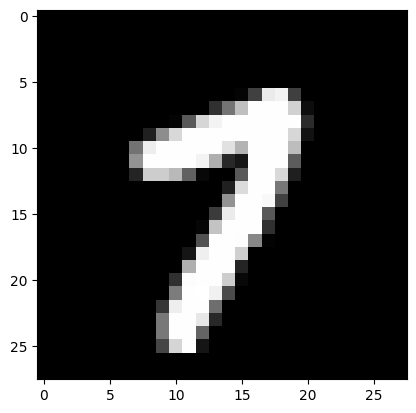

Prediction:  [3]
Label:  3


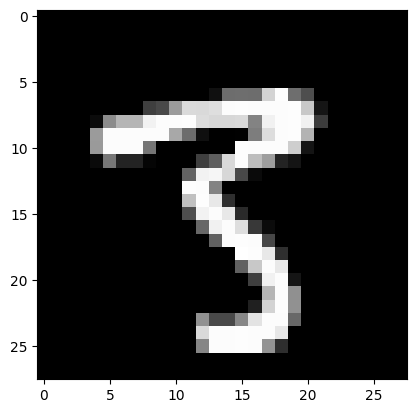

Prediction:  [8]
Label:  8


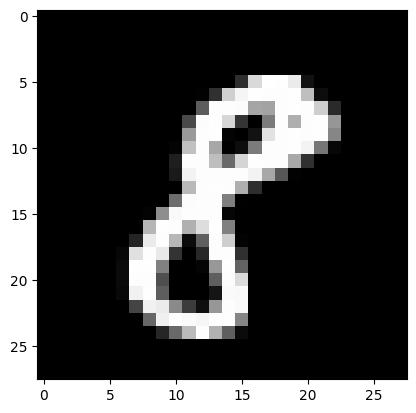

Prediction:  [3]
Label:  3


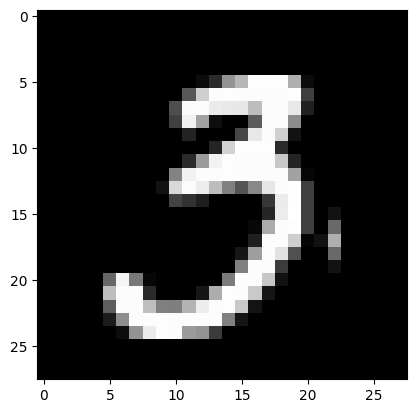

Prediction:  [6]
Label:  6


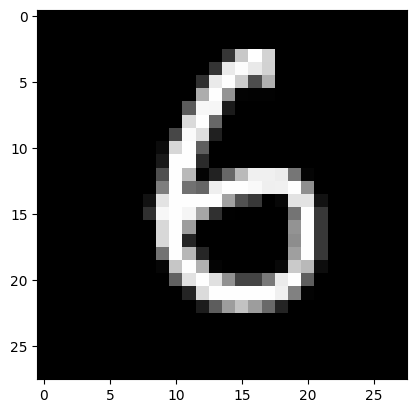

Prediction:  [3]
Label:  3


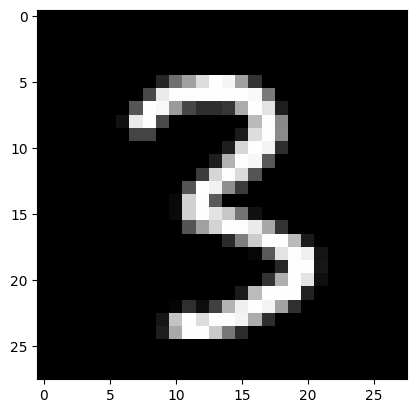

Prediction:  [2]
Label:  7


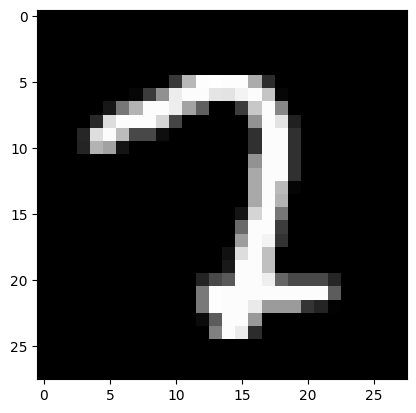

Prediction:  [4]
Label:  9


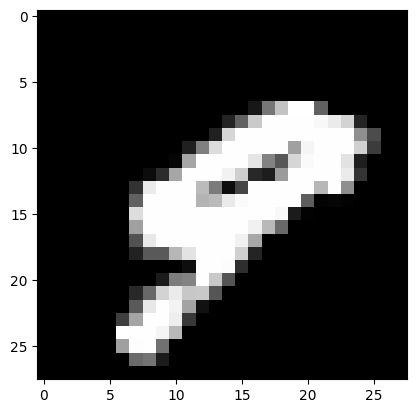

Prediction:  [7]
Label:  3


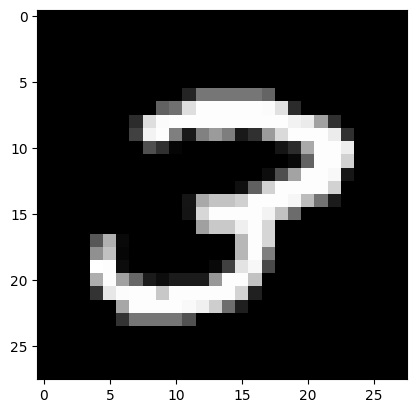

Prediction:  [6]
Label:  6


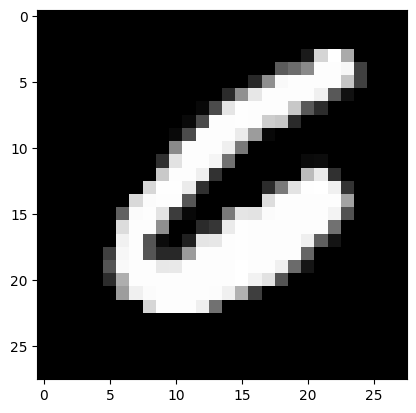

In [72]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)
test_prediction(4, W1, b1, W2, b2)
test_prediction(5, W1, b1, W2, b2)
test_prediction(6, W1, b1, W2, b2)
test_prediction(7, W1, b1, W2, b2)
test_prediction(8, W1, b1, W2, b2)
test_prediction(9, W1, b1, W2, b2)

In [73]:
dev_predictions = make_predictions(valid_pixels, W1, b1, W2, b2)
accuracy(dev_predictions, valid_label)

[2 8 1 2 0 2 3 3 4 5 1 4 1 6 1 0 5 1 7 1 4 0 0 7 2 0 4 0 0 4 4 7 2 3 1 2 2
 3 7 4 7 1 0 2 0 1 2 7 4 0 0 3 4 0 0 1 0 4 7 1 6 1 2 4 0 2 2 2 4 1 0 4 0 2
 4 3 0 1 7 1 0 0 0 0 7 3 7 1 4 1 4 4 0 4 0 2 0 4 2 0 8 4 7 0 4 1 1 8 3 2 0
 1 1 4 3 1 4 6 1 4 8 2 2 4 2 1 1 1 7 2 0 0 0 4 0 0 7 4 2 2 4 0 3 0 9 3 2 7
 3 0 1 1 0 0 2 8 4 6 6 4 0 6 0 2 0 4 4 4 2 3 1 2 0 7 0 1 2 2 1 1 1 0 1 7 0
 2 7 4 1 2 4 2 3 4 5 2 4 3 2 2 0 0 1 4 2 4 2 2 4 0 6 2 0 4 3 2 0 2 1 1 3 1
 4 7 2 1 0 0 0 3 0 0 2 4 7 0 2 3 0 3 3 4 0 4 2 3 4 2 4 7 1 0 4 3 4 2 2 0 3
 2 7 0 1 0 1 4 4 3 2 1 4 4 2 4 3 2 5 4 3 1 2 7 1 0 7 1 3 9 4 2 2 0 3 3 4 1
 1 0 2 5 4 0 7 5 2 7 4 4 2 2 4 3 2 1 1 0 4 1 1 2 0 1 0 2 4 7 3 1 7 4 0 0 3
 5 6 4 1 4 2 4 1 8 2 2 7 7 3 4 2 6 4 5 0 1 0 5 7 2 4 2 0 4 2 0 1 5 4 2 1 2
 0 4 7 2 7 4 2 2 3 1 0 1 1 2 0 2 7 3 2 1 3 8 0 7 1 1 3 4 4 7 4 2 2 7 0 2 2
 3 1 4 4 2 0 4 2 4 3 1 0 8 0 0 3 6 7 1 4 4 1 9 2 0 1 2 0 0 1 1 4 0 1 2 3 2
 4 1 1 5 1 3 2 0 4 2 0 4 0 3 7 2 1 1 4 7 1 1 6 2 5 3 6 1 7 3 2 0 2 0 4 4 1
 0 3 7 2 4 2 4 4 0 2 1 1 

<ipython-input-64-8e8d8b438719>:23: RuntimeWarning: overflow encountered in exp
  return np.exp(Z) / sum(np.exp(Z))
<ipython-input-64-8e8d8b438719>:23: RuntimeWarning: invalid value encountered in divide
  return np.exp(Z) / sum(np.exp(Z))


np.float64(0.573)